In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-safety/dft-road-casualty-statistics-accident-last-5-years.csv
/kaggle/input/road-safety/dft-road-casualty-statistics-casualty-last-5-years.csv
/kaggle/input/road-safety/dft-road-casualty-statistics-vehicle-last-5-years.csv


In [2]:
#Reading dataset
acci = pd.read_csv('/kaggle/input/road-safety/dft-road-casualty-statistics-accident-last-5-years.csv',low_memory=False)
cf = pd.read_csv('/kaggle/input/road-safety/dft-road-casualty-statistics-casualty-last-5-years.csv',low_memory=False)
vf = pd.read_csv('/kaggle/input/road-safety/dft-road-casualty-statistics-vehicle-last-5-years.csv',low_memory=False)

In [3]:
#Accidents Dataframe
acci.head(10)

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,1,3,2,...,0,5,1,1,0,0,1,1,2,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,1,3,1,...,0,4,1,1,0,0,1,1,2,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,1,3,1,...,0,4,1,1,0,0,1,1,2,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,1,3,1,...,0,1,1,1,0,0,1,1,2,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,1,3,2,...,0,1,1,1,0,0,1,1,2,E01002583
5,2016010000019,2016,010000019,530840.0,167100.0,-0.121004,51.387813,1,3,2,...,8,1,1,1,0,0,1,1,2,E01001180
6,2016010000020,2016,010000020,527610.0,181430.0,-0.162234,51.517333,1,3,1,...,0,1,1,1,0,0,1,1,2,E01004658
7,2016010000021,2016,010000021,523830.0,189460.0,-0.213859,51.590341,1,3,2,...,0,1,1,1,0,0,1,1,2,E01000243
8,2016010000023,2016,010000023,524640.0,180620.0,-0.205302,51.510716,1,3,1,...,0,1,1,1,0,0,1,1,2,E01002875
9,2016010000024,2016,010000024,540670.0,174700.0,0.023193,51.453758,1,3,2,...,0,1,1,1,0,0,1,1,2,E01001658


In [4]:
acci.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag
count,597973.000000,597850.000000,5.978500e+05,597840.000000,597840.000000,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000,...,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000,597973.000000
mean,2017.827266,451703.358935,2.820438e+05,-1.260225,52.425656,28.574257,2.792099,1.842209,1.307276,4.109935,...,0.204884,1.044415,2.024188,1.627798,1.363968,0.195765,0.151627,1.331642,1.316391,1.669672
std,1.381319,94929.997358,1.528646e+05,1.392031,1.376865,24.915142,0.437881,0.709933,0.756494,1.924954,...,1.289745,2.260054,1.714039,1.791257,0.886029,1.163435,1.049526,0.471219,0.537858,0.863693
min,2016.000000,64084.000000,1.023500e+04,-7.525273,49.912362,1.000000,1.000000,1.000000,1.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,388020.000000,1.757050e+05,-2.180570,51.467411,5.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
50%,2018.000000,457990.500000,2.227115e+05,-1.143562,51.888019,23.000000,3.000000,2.000000,1.000000,4.000000,...,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000
75%,2019.000000,528980.000000,3.873810e+05,-0.141011,53.380777,45.000000,3.000000,2.000000,1.000000,6.000000,...,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,2020.000000,655391.000000,1.209512e+06,1.759641,60.763722,99.000000,3.000000,24.000000,59.000000,7.000000,...,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000,3.000000,2.000000


In [5]:
#Casualities Dataframe
cf.head(10)

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2016010000005,2016,010000005,2,1,1,1,23,5,3,0,0,0,0,0,2,1,4
1,2016010000006,2016,010000006,1,1,1,2,36,7,3,0,0,0,0,0,9,1,10
2,2016010000008,2016,010000008,1,1,1,1,24,5,3,0,0,0,0,0,9,1,8
3,2016010000016,2016,010000016,1,1,2,2,59,9,3,0,0,0,3,0,11,1,4
4,2016010000018,2016,010000018,2,1,1,1,28,6,3,0,0,0,0,0,1,1,6
5,2016010000019,2016,010000019,1,1,1,2,30,6,3,0,0,0,0,0,9,1,3
6,2016010000020,2016,010000020,1,1,3,2,33,6,3,5,1,0,0,2,0,1,1
7,2016010000021,2016,010000021,2,1,1,2,30,6,3,0,0,0,0,0,9,1,7
8,2016010000023,2016,010000023,1,1,1,1,21,5,3,0,0,0,0,0,4,1,7
9,2016010000024,2016,010000024,1,1,2,2,7,2,3,0,0,0,4,0,11,-1,-1


In [6]:
cf.describe()

,accident_year,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
count,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000,781716.000000
mean,2017.808837,1.477553,1.393182,1.485053,1.395642,36.660602,6.306182,2.825593,0.730536,0.570428,0.252173,0.068772,0.059004,7.270959,1.009290,4.232354
std,1.377568,1.711188,2.454991,0.722330,0.502698,19.393478,2.414841,0.407362,2.080773,1.871116,0.626313,0.501691,0.340125,8.371928,0.977786,3.288848
min,2016.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2017.000000,1.000000,1.000000,1.000000,1.000000,22.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000
50%,2018.000000,1.000000,1.000000,1.000000,1.000000,33.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,4.000000
75%,2019.000000,2.000000,1.000000,2.000000,2.000000,50.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,7.000000
max,2020.000000,999.000000,992.000000,3.000000,9.000000,102.000000,11.000000,3.000000,10.000000,9.000000,9.000000,9.000000,3.000000,99.000000,3.000000,10.000000


In [7]:
#Vehicles Dataframe
vf.head(10)

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,1,8,0,6,3,7,0,...,1,1,51,8,-1,-1,-1,-1,3,1
1,2016010000005,2016,010000005,2,2,0,18,7,3,0,...,6,1,23,5,124,1,4,-1,4,1
2,2016010000006,2016,010000006,1,9,0,18,5,1,0,...,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,1,9,0,18,1,8,0,...,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,1,11,0,18,5,1,0,...,1,1,55,8,6692,2,7,-1,9,1
5,2016010000018,2016,010000018,1,9,0,12,5,1,0,...,6,1,20,4,1596,1,11,-1,2,1
6,2016010000018,2016,010000018,2,1,0,18,5,1,0,...,6,1,28,6,-1,-1,-1,-1,6,1
7,2016010000019,2016,010000019,1,9,0,18,1,5,0,...,6,2,30,6,1596,1,10,-1,3,1
8,2016010000019,2016,010000019,2,9,0,18,1,5,0,...,6,1,27,6,1596,1,5,-1,2,1
9,2016010000020,2016,010000020,1,8,0,18,1,5,0,...,1,1,33,6,2499,2,2,-1,2,1


In [8]:
vf.describe()

,accident_year,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,...,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type
count,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,...,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06,1.101591e+06
mean,2.017825e+03,1.560386e+00,9.888578e+00,1.582838e-01,1.583659e+01,4.271442e+00,4.300102e+00,3.632925e+00,2.507474e+00,5.445315e-01,...,1.268466e+00,4.691385e+00,1.455929e+00,3.528668e+01,5.910159e+00,1.413826e+03,9.799272e-01,5.740133e+00,3.853068e+00,8.293132e-01
std,1.381051e+00,1.538039e+00,1.055153e+01,1.113905e+00,1.720702e+01,2.588701e+00,2.582674e+00,1.818277e+01,3.200459e+00,1.852740e+00,...,1.435534e+00,1.972025e+00,6.596296e-01,2.060971e+01,3.109249e+00,1.611406e+03,1.458456e+00,6.081685e+00,3.526159e+00,1.111177e+00
min,2.016000e+03,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,2.017000e+03,1.000000e+00,9.000000e+00,0.000000e+00,7.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,2.000000e+00,1.000000e+00,2.300000e+01,5.000000e+00,1.240000e+02,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
50%,2.018000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.800000e+01,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,...,1.000000e+00,6.000000e+00,1.000000e+00,3.500000e+01,6.000000e+00,1.395000e+03,1.000000e+00,5.000000e+00,4.000000e+00,1.000000e+00
75%,2.019000e+03,2.000000e+00,9.000000e+00,0.000000e+00,1.800000e+01,7.000000e+00,7.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,...,1.000000e+00,6.000000e+00,2.000000e+00,5.000000e+01,8.000000e+00,1.950000e+03,2.000000e+00,1.000000e+01,7.000000e+00,1.000000e+00
max,2.020000e+03,9.990000e+02,9.900000e+01,9.000000e+00,9.900000e+01,9.000000e+00,9.000000e+00,9.900000e+01,9.000000e+00,9.000000e+00,...,9.000000e+00,6.000000e+00,3.000000e+00,1.020000e+02,1.100000e+01,9.999900e+04,1.200000e+01,9.600000e+01,1.000000e+01,3.000000e+00


In [9]:
urban_acci = len(acci[acci['urban_or_rural_area']==1])
rural_acci = len(acci[acci['urban_or_rural_area']==2])
na_acci = len(acci[acci['urban_or_rural_area']==3])

In [10]:
## data formatting

In [11]:
total_acci = urban_acci + rural_acci +na_acci
urban_pct = urban_acci / total_acci * 100
rural_pct = rural_acci / total_acci * 100
na_pct = na_acci / total_acci * 100

In [12]:
## result overview

In [13]:
print("Percentage of accidents occur in urban areas is {0:.0f}%".format(urban_pct))
print("Percentage of accidents occur in rural areas is {0:.0f}%".format(rural_pct))
print("Percentage of accidents occur in other areas is {0:.0f}%".format(na_pct))

Percentage of accidents occur in urban areas is 67%
Percentage of accidents occur in rural areas is 33%
Percentage of accidents occur in other areas is 0%


In [14]:
## result visualization (bar graph)

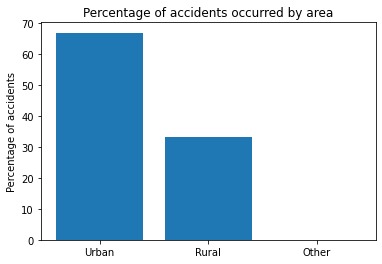

In [15]:
x = ['Urban','Rural','Other']
y = [urban_pct, rural_pct, na_pct]
x_pos = list(range(len(x)))
plt.bar(x_pos, y)
plt.ylabel('Percentage of accidents')
plt.xticks(x_pos, x)
plt.title("Percentage of accidents occurred by area")
plt.show()

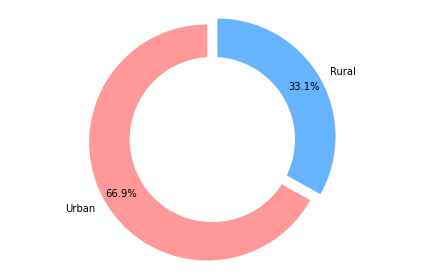

In [16]:
fig1, ax1 = plt.subplots()
explode = (0.05,0.05)
colors = ['#ff9999','#66b3ff','#99ff99']
ax1.pie(y[:2],colors = colors, labels=x[:2], autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [17]:
## <font color = blue> Year-wise pattern in Accidents
## data extraction 

In [18]:
acci['Year'] = acci['accident_index'].map(lambda x: str(x)[:4])
acci['Year'] = acci['Year'].apply(pd.to_numeric, errors='coerce')
year = []
num_of_acci_year = []

In [19]:
for i in range(2016, 2021):
    year.append(i)
    num_of_acci_year.append(len(acci[acci['Year']==i]))

In [20]:
## Line plot for correlation visualization

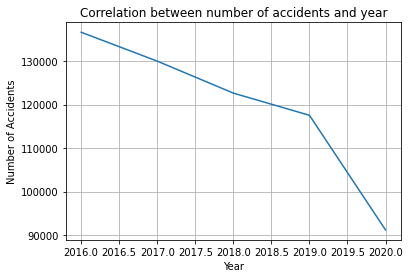

In [21]:
plt.plot(year, num_of_acci_year)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Correlation between number of accidents and year')
plt.grid(True)
plt.show()

In [22]:
year=np.array(year)
acci_year=np.array(num_of_acci_year)

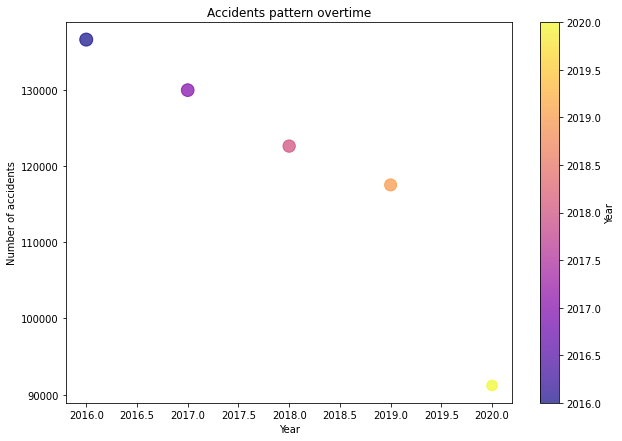

In [23]:
fig, ax1=plt.subplots()
fig.set_size_inches(10,7)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of accidents')
ax1.set_title('Accidents pattern overtime')
c=year
plt.scatter(year,acci_year,c=c,cmap='plasma',s=acci_year//800,alpha=0.7)
cbar=plt.colorbar()
cbar.set_label('Year')

In [24]:
### <font color = blue>Analysis of accidents according to the Severity

In [25]:
Severity1 = len(cf[cf['casualty_severity']==1])
Severity2 = len(cf[cf['casualty_severity']==2])
Severity3 = len(cf[cf['casualty_severity']==3])
tot = Severity1 + Severity2 + Severity3
s1 = (Severity1/tot)*100
s2 = (Severity2/tot)*100
s3 = (Severity3/tot)*100
print("Percentage of Deaths is {0:.0f}%".format(s1))
print("Percentage of Major Injuries is {0:.0f}%".format(s2))
print("Percentage of Minor Injuries is {0:.0f}%".format(s3))

Percentage of Deaths is 1%
Percentage of Major Injuries is 15%
Percentage of Minor Injuries is 84%


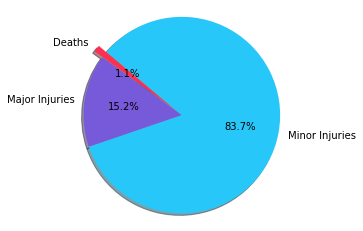

In [26]:
labels = 'Deaths','Major Injuries','Minor Injuries'
sizes = [s1,s2,s3]
colors = ['#ff304f','#775ada','#28c7fa']
explode = (0.1,0,0)
#Plot
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,startangle=140)
plt.axis('equal')
plt.show()

In [27]:
### <font color = blue> Accidents and the age of driver

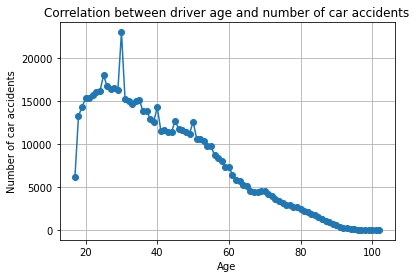

In [28]:
age_acci=vf[['accident_index','age_of_driver','vehicle_type']]
age=[]
num_of_acci=[]
for i in range(17, max(age_acci['age_of_driver'])+1):
    age.append(i)
    num_of_acci.append(len(age_acci[(age_acci['age_of_driver']==i)&(age_acci['vehicle_type']==9)]))
plt.plot(age, num_of_acci,label='Data', marker='o')
plt.xlabel('Age')
plt.ylabel('Number of car accidents')
plt.title('Correlation between driver age and number of car accidents') 
plt.grid(True)
plt.show()      

In [29]:
###<font color=blue>Accident patterns across the gender

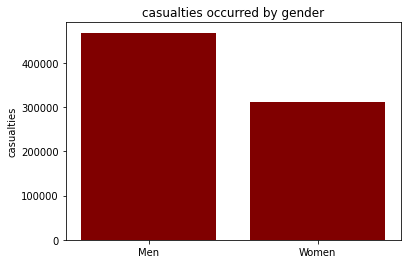

In [30]:
men=len(cf[cf['sex_of_casualty']==1])
women=len(cf[cf['sex_of_casualty']==2])
x=['Men','Women']
y=[men,women]
x_pos=list(range(len(x)))
plt.bar(x_pos,y,color='maroon')
plt.ylabel('casualties')
plt.xticks(x_pos,x)
plt.title("casualties occurred by gender")
plt.show()

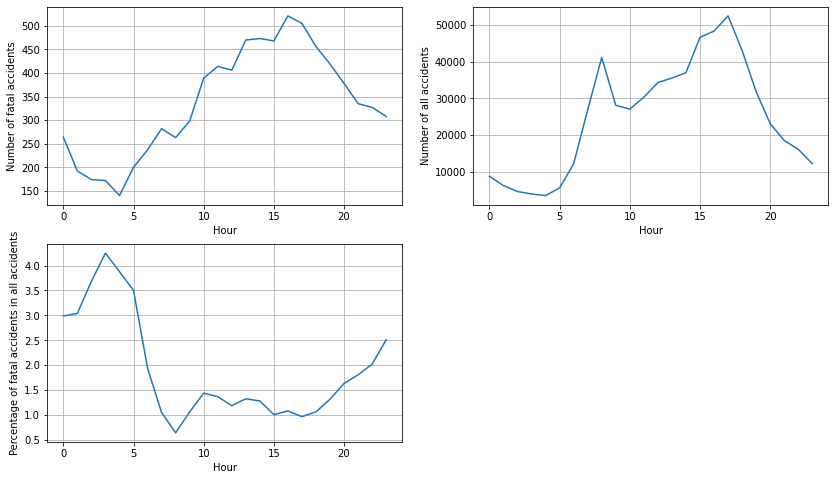

The most dangerous hour to drive,when most fatal accidents happened in all accidents,is 3 o'clock


In [31]:
acci['Hour'] = acci['time'].map(lambda x: str(x).split(':')[0])
acci['Hour'] = acci['Hour'].apply(pd.to_numeric, errors='coerce')
hour = []
num_of_fatal_acci = []
num_of_acci=[]
for i in range(24):
  hour.append(i)
  num_of_fatal_acci_hour=len(acci[(acci['accident_severity']==1)&(acci['Hour']==i)])
  num_of_acci_hour=len(acci[acci['Hour']==i])
  num_of_fatal_acci.append(num_of_fatal_acci_hour)
  num_of_acci.append(num_of_acci_hour)  
  normalized_num_of_fatal_acci=list(np.array(num_of_fatal_acci)/np.array(num_of_acci)*100)
fig=plt.figure(figsize=(14,8))
ax1=fig.add_subplot(221)
ax1.plot(hour,num_of_fatal_acci)
ax1.set_ylabel('Number of fatal accidents')
ax1.set_xlabel('Hour')
ax1.grid(True)
ax2=fig.add_subplot(222)
ax2.plot(hour,num_of_acci)
ax2.set_ylabel('Number of all accidents')
ax2.set_xlabel('Hour')
ax2.grid(True)
ax3=fig.add_subplot(223)
ax3.plot(hour,normalized_num_of_fatal_acci)
ax3.set_ylabel('Percentage of fatal accidents in all accidents')
ax3.set_xlabel('Hour')
ax3.grid(True)
plt.show()
print("The most dangerous hour to drive,when most fatal accidents happened in all accidents,is {} o'clock".format(normalized_num_of_fatal_acci.index(max(normalized_num_of_fatal_acci))))